In [1]:
# 📁 3.1.1 Data Understanding, Analysis, Visualization and Cleaning

# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, shift, zoom

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.utils import shuffle

# Load dataset
df = pd.read_csv("/content/test.csv")

# Extract features and labels
X = df.iloc[:, 1:-1].values.reshape(-1, 48, 48, 1).astype('float32') / 255.0
y = df['Label'].values

# Shuffle the data to ensure class distribution
X, y = shuffle(X, y, random_state=42)

# Data generator
datagen = ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

# Training generator
train_generator = datagen.flow(
    X, y,
    batch_size=32,
    subset='training'
)

# Validation generator
val_generator = datagen.flow(
    X, y,
    batch_size=32,
    subset='validation'
)

In [3]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (7178, 2306)


,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303,pixel2304,Label
0,0,46,34,26,23,12,32,35,26,26,...,150,135,164,168,131,128,165,180,189,0
1,1,55,33,54,32,26,21,50,29,38,...,224,218,222,224,222,202,132,163,187,0
2,2,123,123,126,131,124,69,109,149,159,...,5,3,5,4,3,2,4,4,3,0
3,3,255,255,255,255,255,255,255,255,255,...,177,174,168,88,19,40,37,37,37,0
4,4,127,121,124,137,123,118,120,111,111,...,177,186,174,172,226,131,53,118,233,0



Each row represents a 48x48 grayscale image (flattened) of a human face with an associated emotion label.

Total Images in Dataset: 7178


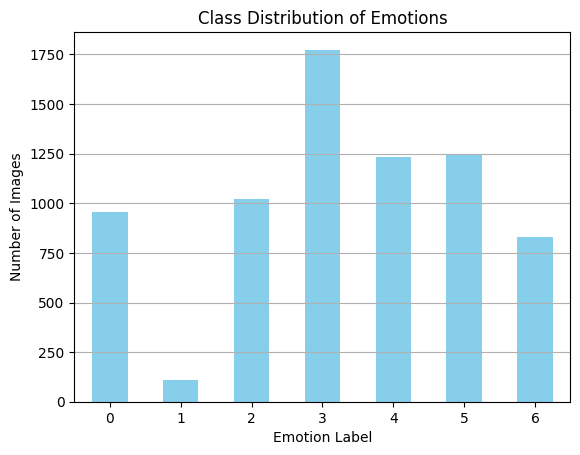


Class Distribution:
 Label
0     958
1     111
2    1024
3    1774
4    1233
5    1247
6     831
Name: count, dtype: int64


In [4]:
# 🧠 Step 3: Dataset Description
print("\nEach row represents a 48x48 grayscale image (flattened) of a human face with an associated emotion label.")

# 🧮 Step 4: Total Images
print(f"\nTotal Images in Dataset: {len(df)}")

# 📊 Step 5: Class Distribution
class_counts = df['Label'].value_counts().sort_index()
class_counts.plot(kind='bar', color='skyblue', title='Class Distribution of Emotions')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Images')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()
print("\nClass Distribution:\n", class_counts)

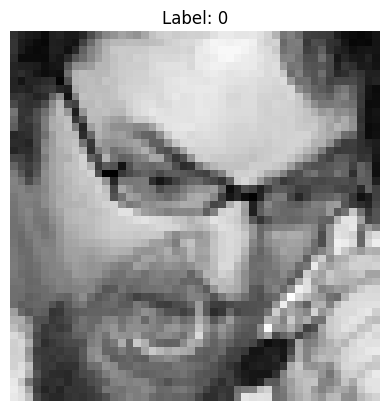

In [5]:
# 🖼️ Step 6: Visualize One Image
image_data = df.iloc[0, 1:-1].values.reshape(48, 48)
plt.imshow(image_data, cmap='gray')
plt.title(f"Label: {df.iloc[0, -1]}")
plt.axis('off')
plt.show()

In [6]:
# 🔄 Step 7: Data Augmentation Function
def augment_image(img):
    angle = np.random.uniform(-20, 20)
    rotated = rotate(img, angle, reshape=False, mode='nearest')

    shift_x, shift_y = np.random.uniform(-5, 5, 2)
    shifted = shift(rotated, [shift_x, shift_y], mode='nearest')

    zoom_factor = np.random.uniform(0.9, 1.1)
    zoomed = zoom(shifted, zoom_factor)
    center = zoomed.shape[0] // 2
    cropped = zoomed[
        center - 24:center + 24,
        center - 24:center + 24
    ] if zoomed.shape[0] >= 48 else np.pad(zoomed, ((0, 48 - zoomed.shape[0]), (0, 48 - zoomed.shape[1])), mode='edge')

    return cropped[:48, :48]


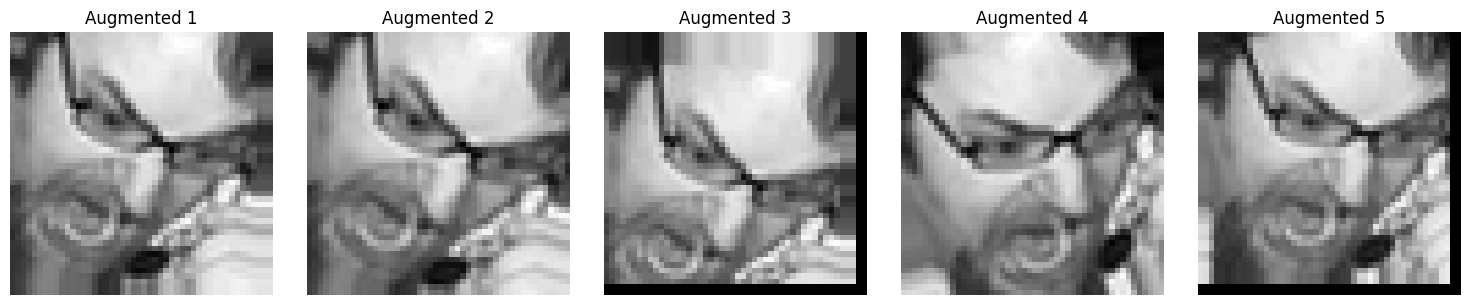

In [7]:
# 🎨 Step 8: Show Augmented Samples
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    aug_img = augment_image(image_data)
    axes[i].imshow(aug_img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Augmented {i+1}")
plt.tight_layout()
plt.show()

In [8]:

# ✂️ Step 9: Suggested Train-Validation Split (description only)
print("\n📌 Suggested Split:")
print("80% Training, 20% Validation using stratified sampling to maintain class balance.\n")


📌 Suggested Split:
80% Training, 20% Validation using stratified sampling to maintain class balance.



In [9]:
# 🧼 Step 10: Preprocessing Summary
print("🔧 Preprocessing Techniques:")
print("- Reshape: Flattened 2304 pixels → 48x48 grayscale image")
print("- Normalize: Scale pixel values from 0–255 to [0, 1]")
print("- Label Encoding: Labels are already numeric (0–6)")

print("\n🔄 Data Generators (optional during training):")
print("Use Keras' ImageDataGenerator for real-time preprocessing and augmentation.")


🔧 Preprocessing Techniques:
- Reshape: Flattened 2304 pixels → 48x48 grayscale image
- Normalize: Scale pixel values from 0–255 to [0, 1]
- Label Encoding: Labels are already numeric (0–6)

🔄 Data Generators (optional during training):
Use Keras' ImageDataGenerator for real-time preprocessing and augmentation.


✅ 3.1.2 – Design, Train, and Evaluate a Baseline Model
python
Copy
Edit


In [10]:
# 📦 Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 🧠 Step 2: Build Baseline CNN Model
model = Sequential()

# 🔁 Convolutional Block 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 🔁 Convolutional Block 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 🔁 Convolutional Block 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 🧱 Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))

# 🎯 Output Layer (Assuming 7 emotion classes)
model.add(Dense(7, activation='softmax'))

# ⚙️ Step 3: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 📝 Step 4: Print Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 658,823 (2.51 MB)

 Trainable params: 658,823 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

✅ 3.1.2 – 2. Model Training

In [11]:
# 📦 Required Libraries
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 🧹 Step 1: Prepare the Dataset
# Drop unnecessary columns and extract features + labels
X = df.iloc[:, 1:-1].values.reshape(-1, 48, 48, 1)  # Reshape to (num_samples, 48, 48, 1)
y = df['Label'].values

# Normalize pixel values to [0, 1]
X = X.astype('float32') / 255.0

# 🧪 Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🏋️ Step 2: Train the Model
EPOCHS = 20  # You can increase this for better performance
BATCH_SIZE = 64

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.2188 - loss: 1.8657 - val_accuracy: 0.2472 - val_loss: 1.8151
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2462 - loss: 1.8268 - val_accuracy: 0.2493 - val_loss: 1.8014
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2603 - loss: 1.8005 - val_accuracy: 0.2542 - val_loss: 1.7714
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2862 - loss: 1.7393 - val_accuracy: 0.3273 - val_loss: 1.6739
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3434 - loss: 1.6470 - val_accuracy: 0.3844 - val_loss: 1.5747
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3612 - loss: 1.6025 - val_accuracy: 0.3942 - val_loss: 1.5547
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4007 - loss: 1.5268 - val_accuracy: 0.4345 - val_loss: 1.4956
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4337 - loss: 1.4610 - val_accuracy: 0.4366 - val_los

📉 Step 3: Plot Training vs Validation Loss Curves

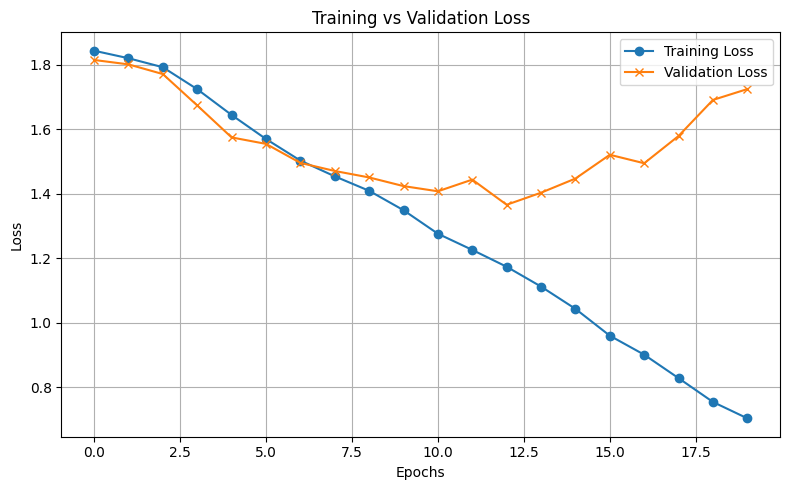

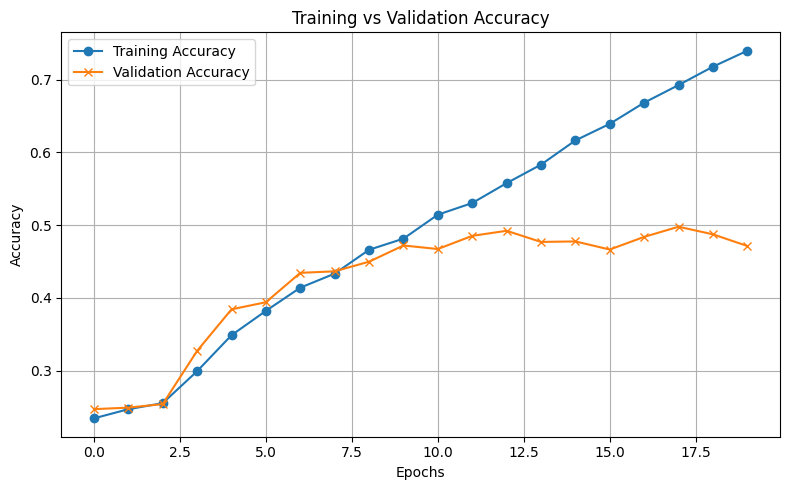

In [12]:
# 📊 Plot Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, you can plot accuracy as well:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ 3.1.2 – 3. Model Evaluation

In [13]:
# 📦 Required Libraries
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 📊 Step 1: Evaluate on Validation Set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"✅ Validation Accuracy: {val_accuracy:.4f}")
print(f"❌ Validation Loss: {val_loss:.4f}")

# 📈 Step 2: Classification Report
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Detailed metrics
report = classification_report(y_val, y_pred_classes, digits=4)
print("📋 Classification Report:\n", report)


✅ Validation Accuracy: 0.4714
❌ Validation Loss: 1.7248
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
📋 Classification Report:
               precision    recall  f1-score   support

           0     0.4110    0.3125    0.3550       192
           1     1.0000    0.0455    0.0870        22
           2     0.3446    0.2488    0.2890       205
           3     0.7321    0.6620    0.6953       355
           4     0.3937    0.5101    0.4444       247
           5     0.3167    0.4337    0.3661       249
           6     0.6038    0.5783    0.5908       166

    accuracy                         0.4714      1436
   macro avg     0.5431    0.3987    0.4039      1436
weighted avg     0.4929    0.4714    0.4702      1436



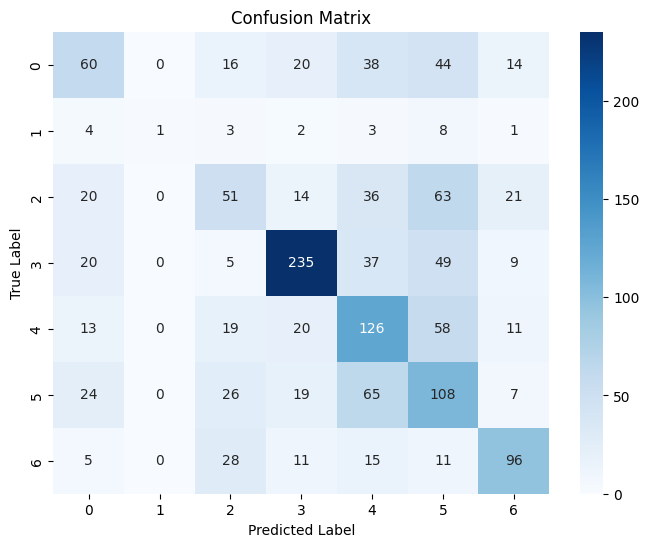

In [14]:
# 🧮 Confusion Matrix
cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


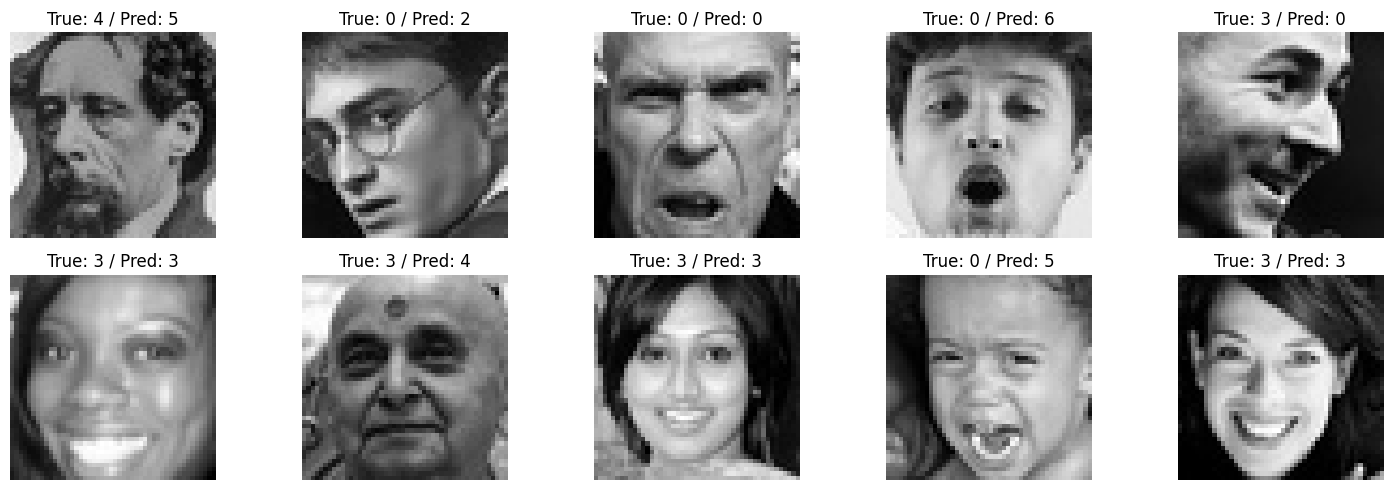

In [15]:
# 🔍 Show predictions for 10 random samples
indices = np.random.choice(len(X_val), 10, replace=False)
plt.figure(figsize=(15, 5))

for i, idx in enumerate(indices):
    img = X_val[idx].reshape(48, 48)
    true_label = y_val[idx]
    pred_label = y_pred_classes[idx]

    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label} / Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


✅ 3.1.3 – Deeper CNN Architecture with Regularization

In [16]:
# 📦 Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# 🧠 Build a deeper CNN model (at least double layers compared to baseline)
deep_model = Sequential()

# 🔁 Conv Block 1
deep_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
deep_model.add(BatchNormalization())
deep_model.add(MaxPooling2D(pool_size=(2, 2)))
deep_model.add(Dropout(0.25))

# 🔁 Conv Block 2
deep_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
deep_model.add(BatchNormalization())
deep_model.add(MaxPooling2D(pool_size=(2, 2)))
deep_model.add(Dropout(0.25))

# 🔁 Conv Block 3
deep_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
deep_model.add(BatchNormalization())
deep_model.add(MaxPooling2D(pool_size=(2, 2)))
deep_model.add(Dropout(0.3))

# 🔁 Conv Block 4
deep_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
deep_model.add(BatchNormalization())
deep_model.add(MaxPooling2D(pool_size=(2, 2)))
deep_model.add(Dropout(0.4))

# 🔁 Fully Connected Layers
deep_model.add(Flatten())
deep_model.add(Dense(512, activation='relu'))
deep_model.add(Dropout(0.5))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dropout(0.4))
deep_model.add(Dense(64, activation='relu'))

# 🎯 Output Layer
deep_model.add(Dense(7, activation='softmax'))

# ⚙️ Compile model
deep_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# 🧾 Model Summary
deep_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           45

 Total params: 2,217,095 (8.46 MB)

 Trainable params: 2,215,687 (8.45 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [17]:
# 📈 Train deeper model (same data as before)
EPOCHS = 25
BATCH_SIZE = 64

deep_history = deep_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)


Epoch 1/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 24s 132ms/step - accuracy: 0.1861 - loss: 2.6029 - val_accuracy: 0.2472 - val_loss: 1.8370
Epoch 2/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2175 - loss: 1.9013 - val_accuracy: 0.2472 - val_loss: 1.8276
Epoch 3/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2186 - loss: 1.8638 - val_accuracy: 0.2472 - val_loss: 1.8219
Epoch 4/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2396 - loss: 1.8233 - val_accuracy: 0.2361 - val_loss: 1.8719
Epoch 5/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2403 - loss: 1.8097 - val_accuracy: 0.2208 - val_loss: 1.9043
Epoch 6/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2518 - loss: 1.7959 - val_accuracy: 0.2479 - val_loss: 1.7997
Epoch 7/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2704 - loss: 1.7667 - val_accuracy: 0.2577 - val_loss: 1.7740
Epoch 8/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.2902 - loss: 1.7280 - val_accuracy: 0.3064 -

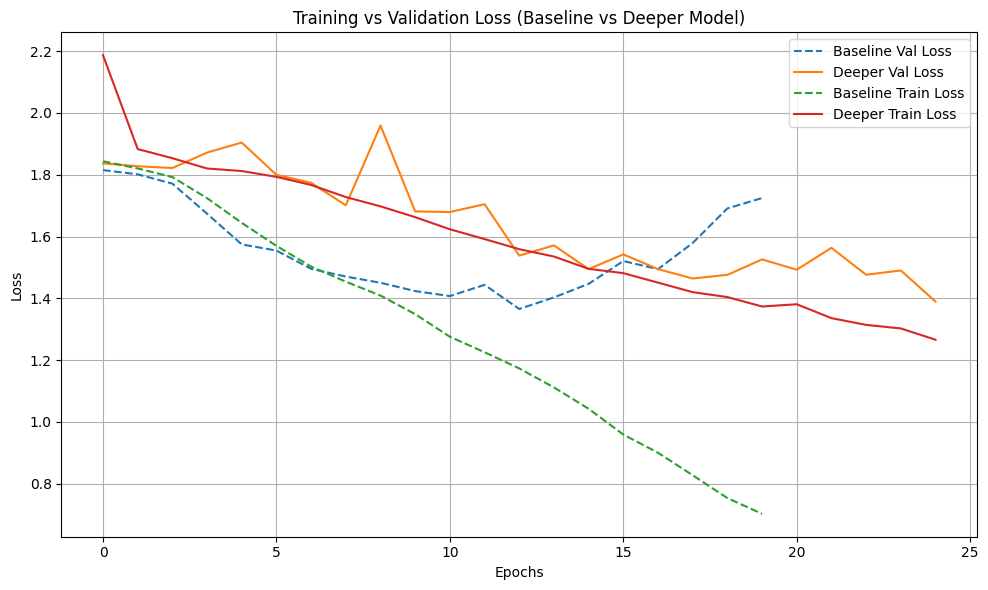

In [18]:
# 📊 Compare loss curves between baseline and deeper model
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_loss'], label='Baseline Val Loss', linestyle='--')
plt.plot(deep_history.history['val_loss'], label='Deeper Val Loss', linestyle='-')
plt.plot(history.history['loss'], label='Baseline Train Loss', linestyle='--')
plt.plot(deep_history.history['loss'], label='Deeper Train Loss', linestyle='-')
plt.title('Training vs Validation Loss (Baseline vs Deeper Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Deeper Model Accuracy: 0.4826
❌ Deeper Model Loss: 1.3897
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
📋 Deeper Model Classification Report:
               precision    recall  f1-score   support

           0     0.2000    0.0052    0.0102       192
           1     0.0000    0.0000    0.0000        22
           2     0.3390    0.1951    0.2477       205
           3     0.6777    0.8056    0.7362       355
           4     0.4129    0.4413    0.4266       247
           5     0.3065    0.5663    0.3977       249
           6     0.6946    0.6988    0.6967       166

    accuracy                         0.4826      1436
   macro avg     0.3758    0.3875    0.3593      1436
weighted avg     0.4471    0.4826    0.4416      1436



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


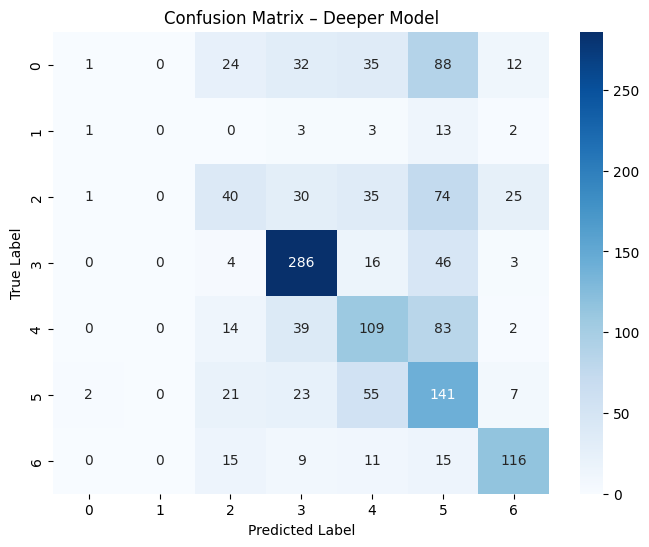

In [19]:
# 🎯 Evaluate deeper model
val_loss_deep, val_acc_deep = deep_model.evaluate(X_val, y_val, verbose=0)
print(f"✅ Deeper Model Accuracy: {val_acc_deep:.4f}")
print(f"❌ Deeper Model Loss: {val_loss_deep:.4f}")

# 📈 Classification Report
y_pred_deep = deep_model.predict(X_val)
y_pred_classes_deep = np.argmax(y_pred_deep, axis=1)

report_deep = classification_report(y_val, y_pred_classes_deep, digits=4)
print("📋 Deeper Model Classification Report:\n", report_deep)

# 🔍 Confusion Matrix
cm_deep = confusion_matrix(y_val, y_pred_classes_deep)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_deep, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix – Deeper Model')
plt.show()


✅ 3.2 – Fine-Tuning a Pre-Trained Model
🔁 3.2.1 – Loading and Adapting a Pre-Trained CNN Model

In [20]:
from sklearn.model_selection import train_test_split
# 🧹 Step 1: Prepare the Dataset
# Drop unnecessary columns and extract features + labels
X = df.iloc[:, 1:-1].values.reshape(-1, 48, 48, 1)  # Reshape to (num_samples, 48, 48, 1)
y = df['Label'].values

# Normalize pixel values to [0, 1]
X = X.astype('float32') / 255.0

# 🧪 Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input


In [22]:

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import gc

# Clear session to free up memory
tf.keras.backend.clear_session()
gc.collect()

# Load the VGG16 model with pretrained weights (exclude top classifier layers)
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze all the layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)  # Adjust number of classes if needed

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,243 (80.64 MB)

 Trainable params: 6,423,555 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
# Freeze all layers in base model
for layer in base_model.layers:
    layer.trainable = False


In [24]:
# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

# Output layer for 7 emotion classes
output = Dense(7, activation='softmax')(x)

# Final model
transfer_model = Model(inputs=base_model.input, outputs=output)

# Compile model
transfer_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Print model summary
transfer_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 14,862,919 (56.70 MB)

 Trainable params: 148,231 (579.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [25]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# ✅ 1. Expand grayscale (48x48x1) to RGB (48x48x3)
X_rgb = np.repeat(X, 3, axis=-1)  # shape: (samples, 48, 48, 3)

# ✅ 2. Resize to match VGG16 input (224x224x3)
X_resized = tf.image.resize(X_rgb, [224, 224]).numpy()  # shape: (samples, 224, 224, 3)

# ✅ 3. Train/val split
X_train, X_val, y_train, y_val = train_test_split(X_resized, y, test_size=0.2, stratify=y, random_state=42)

# ✅ 4. Define ImageDataGenerators with VGG16 preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

# ✅ 5. Create generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=32, shuffle=True)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32, shuffle=False)


✅ 3.2.2 – Model Training and Fine-Tuning


In [26]:
# Recompile the model
transfer_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train with generators
feature_history = transfer_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 73s 313ms/step - accuracy: 0.1554 - loss: 2.6910 - val_accuracy: 0.2472 - val_loss: 1.8426
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 206ms/step - accuracy: 0.1988 - loss: 2.0239 - val_accuracy: 0.2472 - val_loss: 1.8589
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 207ms/step - accuracy: 0.1907 - loss: 1.9514 - val_accuracy: 0.2472 - val_loss: 1.8624
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 38s 210ms/step - accuracy: 0.1982 - loss: 1.8985 - val_accuracy: 0.2472 - val_loss: 1.8491
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 206ms/step - accuracy: 0.2150 - loss: 1.8804 - val_accuracy: 0.2472 - val_loss: 1.8398
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 206ms/step - accuracy: 0.2095 - loss: 1.8752 - val_accuracy: 0.2472 - val_loss: 1.8379
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 205ms/step - accuracy: 0.2241 - loss: 1.8549 - val_accuracy: 0.2472 - val_loss: 1.8322
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 205ms/step - accuracy: 0.2245 - loss: 1.8446 - val

🔁 2. Fine-Tuning Strategy

In [27]:
# Unfreeze top N layers of the base model (e.g., last 8 layers)
for layer in base_model.layers[-8:]:
    layer.trainable = True

# Recompile with a lower learning rate for fine-tuning
transfer_model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model using generators
fine_tune_history = transfer_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 75s 336ms/step - accuracy: 0.2152 - loss: 1.8458 - val_accuracy: 0.2472 - val_loss: 1.8312
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 52s 286ms/step - accuracy: 0.2197 - loss: 1.8510 - val_accuracy: 0.2472 - val_loss: 1.8297
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 51s 286ms/step - accuracy: 0.2246 - loss: 1.8536 - val_accuracy: 0.2472 - val_loss: 1.8187
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 51s 285ms/step - accuracy: 0.2302 - loss: 1.8429 - val_accuracy: 0.2472 - val_loss: 1.8223
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 52s 286ms/step - accuracy: 0.2383 - loss: 1.8405 - val_accuracy: 0.2472 - val_loss: 1.8240
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 51s 286ms/step - accuracy: 0.2274 - loss: 1.8400 - val_accuracy: 0.2472 - val_loss: 1.8268
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 51s 285ms/step - accuracy: 0.2243 - loss: 1.8346 - val_accuracy: 0.2472 - val_loss: 1.8261
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 51s 286ms/step - accuracy: 0.2433 - loss: 1

✅ 3.2.3 – Model Evaluation and Prediction

In [29]:
# ✅ Evaluate using the generator
val_loss_transfer, val_acc_transfer = transfer_model.evaluate(val_generator, verbose=0)
print(f"✅ Transfer Learning Accuracy: {val_acc_transfer:.4f}")
print(f"❌ Transfer Learning Loss: {val_loss_transfer:.4f}")

# ✅ Predict using generator
y_pred_probs = transfer_model.predict(val_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Use y_val directly (you created val_generator using .flow())
y_true = y_val

# ✅ Classification report
from sklearn.metrics import classification_report
report_transfer = classification_report(y_true, y_pred_classes, digits=4)
print("📋 Transfer Learning Classification Report:\n", report_transfer)


✅ Transfer Learning Accuracy: 0.2472
❌ Transfer Learning Loss: 1.8229
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step
📋 Transfer Learning Classification Report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       192
           1     0.0000    0.0000    0.0000        22
           2     0.0000    0.0000    0.0000       205
           3     0.2472    1.0000    0.3964       355
           4     0.0000    0.0000    0.0000       247
           5     0.0000    0.0000    0.0000       249
           6     0.0000    0.0000    0.0000       166

    accuracy                         0.2472      1436
   macro avg     0.0353    0.1429    0.0566      1436
weighted avg     0.0611    0.2472    0.0980      1436



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


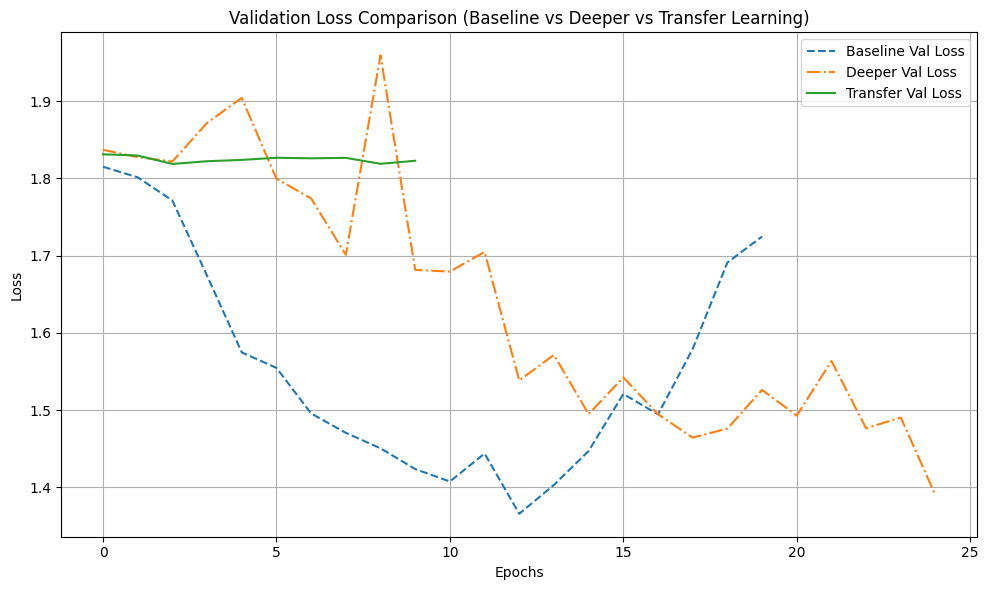

In [30]:
# Combine all three for comparison
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_loss'], label='Baseline Val Loss', linestyle='--')
plt.plot(deep_history.history['val_loss'], label='Deeper Val Loss', linestyle='-.')
plt.plot(fine_tune_history.history['val_loss'], label='Transfer Val Loss', linestyle='-')
plt.title('Validation Loss Comparison (Baseline vs Deeper vs Transfer Learning)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


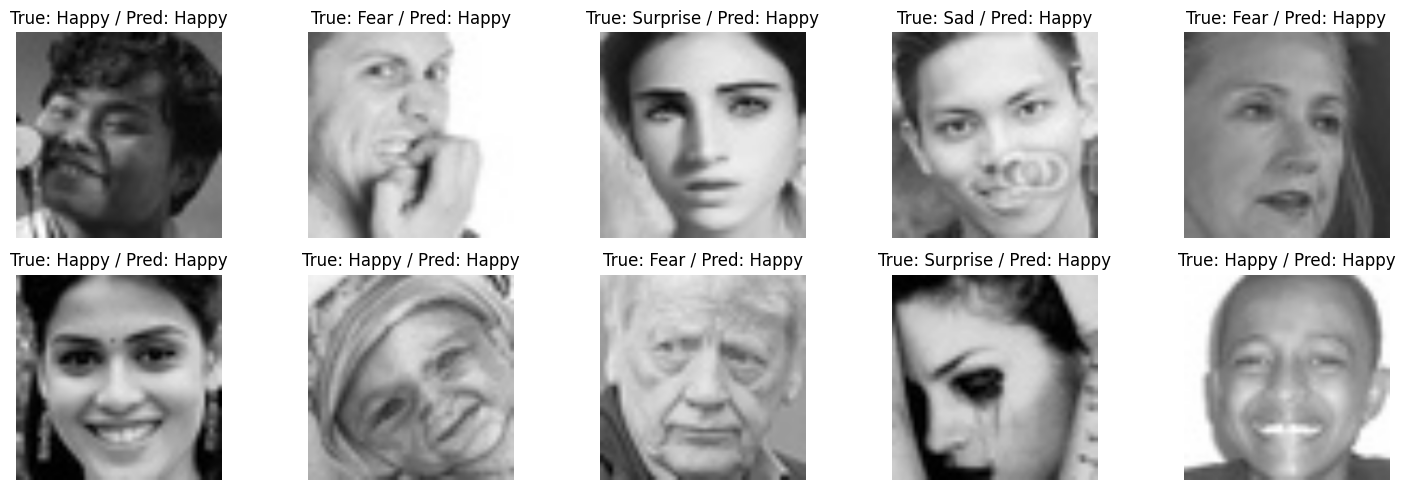

In [32]:
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Show predictions for 10 random samples
indices = np.random.choice(len(X_val), 10, replace=False)
plt.figure(figsize=(15, 5))

for i, idx in enumerate(indices):
    img = X_val[idx]
    true_label = y_val[idx]
    pred_label = y_pred_classes[idx]

    plt.subplot(2, 5, i + 1)
    plt.imshow((img * 255).astype('uint8'))
    plt.title(f"True: {class_labels[true_label]} / Pred: {class_labels[pred_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
